In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
Xp = np.meshgrid(np.arange(-1.5,1.5,0.005),np.arange(-1.5,1.5,0.005))


In [71]:
# Extract x and y coordinates from the current X (meshgrid output)
x_coords = Xp[0].flatten()
y_coords = Xp[1].flatten()

# Calculate z: 1 if (x,y) is in the unit circle, 0 otherwise
# Unit circle condition: x^2 + y^2 <= 1

z_values = ((x_coords**2 + y_coords**2) <= 1).astype(int)

# Combine x, y, and z into a new dataset
# Each row will be [x, y, z]
X1 = np.column_stack((x_coords, y_coords))
y1 = z_values

print("Shape of the new unit circle dataset (x, y, z):", X1.shape, y1.shape)
print("First 5 rows of the new dataset:\n", X1[:5], y1[:5])

Shape of the new unit circle dataset (x, y, z): (360000, 2) (360000,)
First 5 rows of the new dataset:
 [[-1.5   -1.5  ]
 [-1.495 -1.5  ]
 [-1.49  -1.5  ]
 [-1.485 -1.5  ]
 [-1.48  -1.5  ]] [0 0 0 0 0]


In [102]:
y_true = np.where(y1==1)[0]
y_false = np.where(y1==0)[0]
print(y_true.shape, y_false.shape)
rng = np.random.default_rng() 
y_true = rng.choice(y_true, size=10000, replace=False)
y_false = rng.choice(y_false, size=10000, replace=False)
print(y_true.shape, y_false.shape)

X = np.row_stack([X1[y_true], X1[y_false]])
y = np.concatenate([y1[y_true], y1[y_false]])
print(X.shape, y.shape)

(125621,) (234379,)
(10000,) (10000,)
(20000, 2) (20000,)


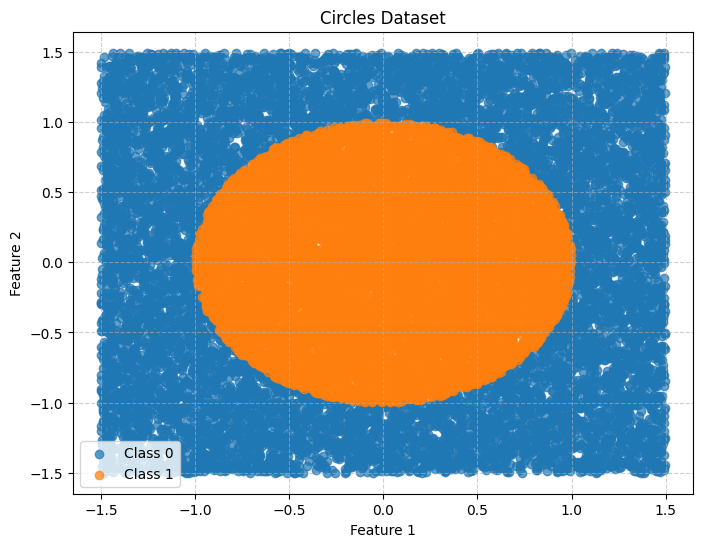

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7)
plt.title('Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [108]:
model  = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    tf.keras.layers.Dense(4, activation='linear'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
X.shape, y.shape

((20000, 2), (20000,))

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['accuracy'])

In [121]:
history = model.fit(X_train,y_train, epochs = 10, validation_split=0.2,
              batch_size=1000)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5135 - loss: 0.6930 - val_accuracy: 0.5047 - val_loss: 0.6932
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4912 - loss: 0.6930 - val_accuracy: 0.5153 - val_loss: 0.6931
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5528 - loss: 0.6930 - val_accuracy: 0.5390 - val_loss: 0.6930
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5652 - loss: 0.6930 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5039 - loss: 0.6930 - val_accuracy: 0.4660 - val_loss: 0.6932
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4893 - loss: 0.6930 - val_accuracy: 0.5197 - val_loss: 0.6931
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5176 - loss: 0.6930 - val_accuracy: 0.5150 - val_loss: 0.6931
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5154 - loss: 0.6930 - val_accuracy: 0.5300 - val_loss:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


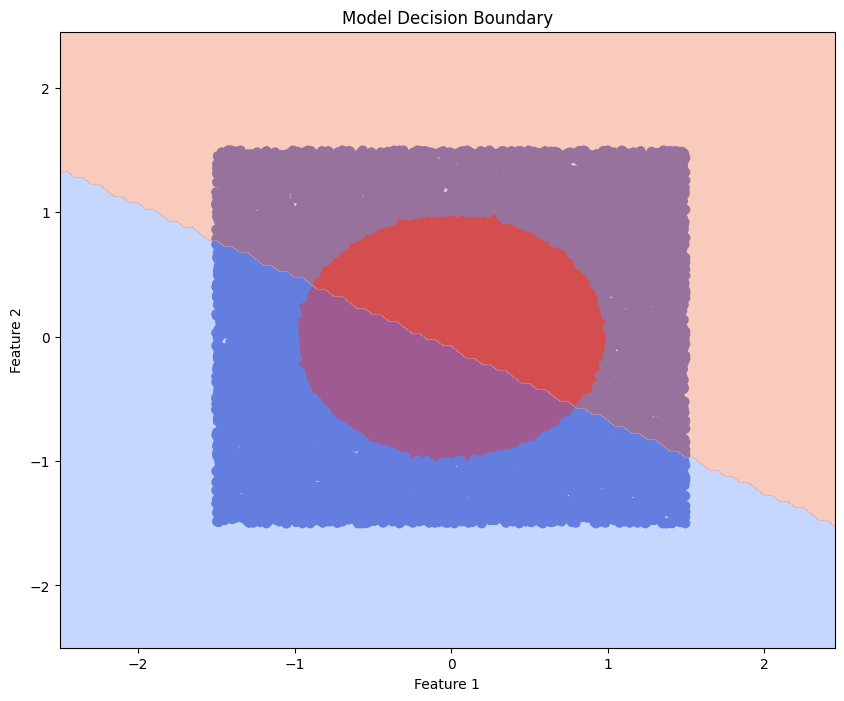

In [128]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict on the meshgrid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z > 0.5 # Convert probabilities to binary class predictions
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

# Plot the original dataset points
plt.title('Model Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Stuff

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# ── 1. Data: random points in [-1.5, 1.5]², label = inside unit circle ────────

# ── 2. Build models with n linear neurons ────────────────────────────────────
def make_model(n_neurons):
    model = keras.Sequential([
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(n_neurons, activation=lambda x:x),
        keras.layers.Dense(1, activation='sigmoid')
    ], name=f"{n_neurons}_linear_neurons")
    model.compile(tf.keras.optimizers.Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ── 3. Train and plot ─────────────────────────────────────────────────────────
def plot_boundary(model, X, y, title, ax):
    h = 0.1
    x_min, x_max = -2,2+h
    y_min, y_max = -2,2+h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid, verbose=0).reshape(xx.shape)

    #ax.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.9,
    #            colors=['#4477AA', '#EE6633'])
    #ax.contourf(xx,yy,Z, levels=[0,0.5,1], alpha = 0.9)
    ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Draw true unit circle for reference
    theta = np.linspace(0, 2*np.pi, 300)
    ax.plot(np.cos(theta), np.sin(theta), 'g--', linewidth=1.5, label='true circle')

    ax.scatter(X[y==0, 0], X[y==0, 1], c='#4477AA', edgecolors='k', s=15, alpha=0.5)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='#EE6633', edgecolors='k', s=15, alpha=0.5)

    _, acc = model.evaluate(X, y, verbose=0)
    ax.set_title(f"{title}\nacc = {acc:.3f}", fontsize=12)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)


In [156]:

configs = [1,2,3,4]
models = []

for n in configs:
    m = make_model(n)
    print("Processing ", n)
    m.fit(X_train, y_train, epochs=20, batch_size=512, verbose=0)
    models.append(m)


Processing  1
Processing  2
Processing  3
Processing  4


Done.
Done.
Done.
Done.


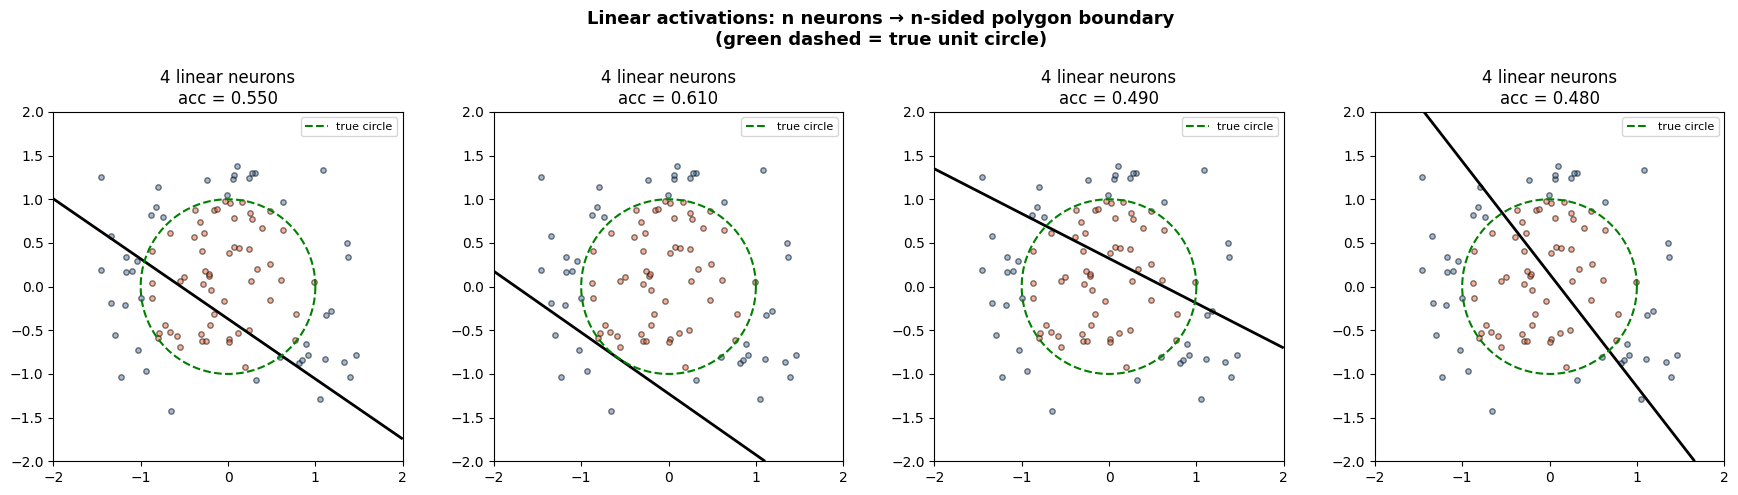

In [157]:

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

for (ax, m) in zip(axes, models):
  plot_boundary(m, X_train[:100], y_train[:100], f"{n} linear neurons", ax)

  plt.suptitle("Linear activations: n neurons → n-sided polygon boundary\n"
              "(green dashed = true unit circle)",
              fontsize=13, fontweight='bold')
  plt.tight_layout()
  plt.savefig("circle_boundary.png", dpi=150, bbox_inches='tight')
  print("Done.")